# ENCUESTA DE CURSADA
## Segundo Cuatrimestre 2017
### Departamento de Computación FIUBA

In [11]:
import numpy as np 
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

In [12]:
comp = pd.read_csv('encuesta3.csv')
comp.sample(1)

Timestamp                 Curso  \
447  2017/12/13 4:20:11 PM GMT-3  Simulación - Cadoche   

    Opinión General Sobre el Curso ¿Aprobó la Cursada?  \
447                        Regular                  Sí   

    ¿Cómo te Resultaron los Temas de la Materia?  \
447                            Poco Interesantes   

    ¿Los Temas de la Materia Están Actualizados?  \
447                                           No   

    Nivel de las Clases Teóricas del Curso  \
447                              Regulares   

    Nivel de las Clases Prácticas del Curso Dificultad del Curso  \
447                               Regulares               Normal   

    Dificultad del TP                         Comentarios Sobre el Curso  
447            Normal  Encuentro muy fuera de lugar que el Lic. Cadoc...

#### Total de Encuestas Procesadas

In [13]:
print(len(comp))

680


In [14]:
# This not used :)
filter = (comp["Comentarios Sobre el Curso"].notnull())
opinions = comp.loc[filter,['Curso','Comentarios Sobre el Curso']].sort_values('Curso')

In [15]:
def map_answers(comp):
    map_sino = {'Sí':5,'No':1}
    map_opinion = {'Excelente':5,'Muy Bueno':4, 'Bueno':3,'Regular':2,'Malo':1}
    map_temas = {'Interesantes':4,'Muy Interesantes':5, 'Poco Interesantes':2,'Nada Interesantes':1}
    map_clases_teoricas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No hay clases teóricas':np.NaN}
    map_dificultad_tp = {'Muy dificil':5,'Dificil':4,'Normal':3,'Fácil':2,'Muy Fácil':1, 'No hay TP': np.NaN}
    map_dificultad = {'Muy Dificil':5,'Dificil':4,'Normal':3,'Facil':2,'Muy Facil':1, 'No hay TP': np.NaN}
    map_clases_practicas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No Hay Clases Prácticas':np.NaN}
    comp.replace({"¿Aprobó la Cursada?": map_sino},inplace=True)
    comp.replace({"¿Los Temas de la Materia Están Actualizados?": map_sino},inplace=True)
    comp.replace({"Opinión General Sobre el Curso": map_opinion},inplace=True)
    comp.replace({"Nivel de las Clases Teóricas del Curso": map_clases_teoricas},inplace=True)
    comp.replace({"Nivel de las Clases Prácticas del Curso": map_clases_practicas},inplace=True)
    comp.replace({"Dificultad del Curso": map_dificultad},inplace=True)
    comp.replace({"Dificultad del TP": map_dificultad_tp},inplace=True)
    comp.replace({"¿Cómo te Resultaron los Temas de la Materia?": map_temas},inplace=True)
    return comp

In [16]:
comp = map_answers(comp)

## Histograma de calificaciones para la opinión general sobre el curso


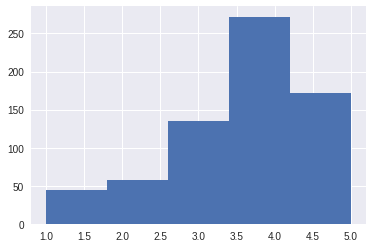

In [17]:
comp['Opinión General Sobre el Curso'].hist(bins=5);

In [18]:
grouped = comp.groupby('Curso')
num_votes = grouped.agg('size')
g_mean = grouped.mean()
g_mean['votes']=num_votes

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

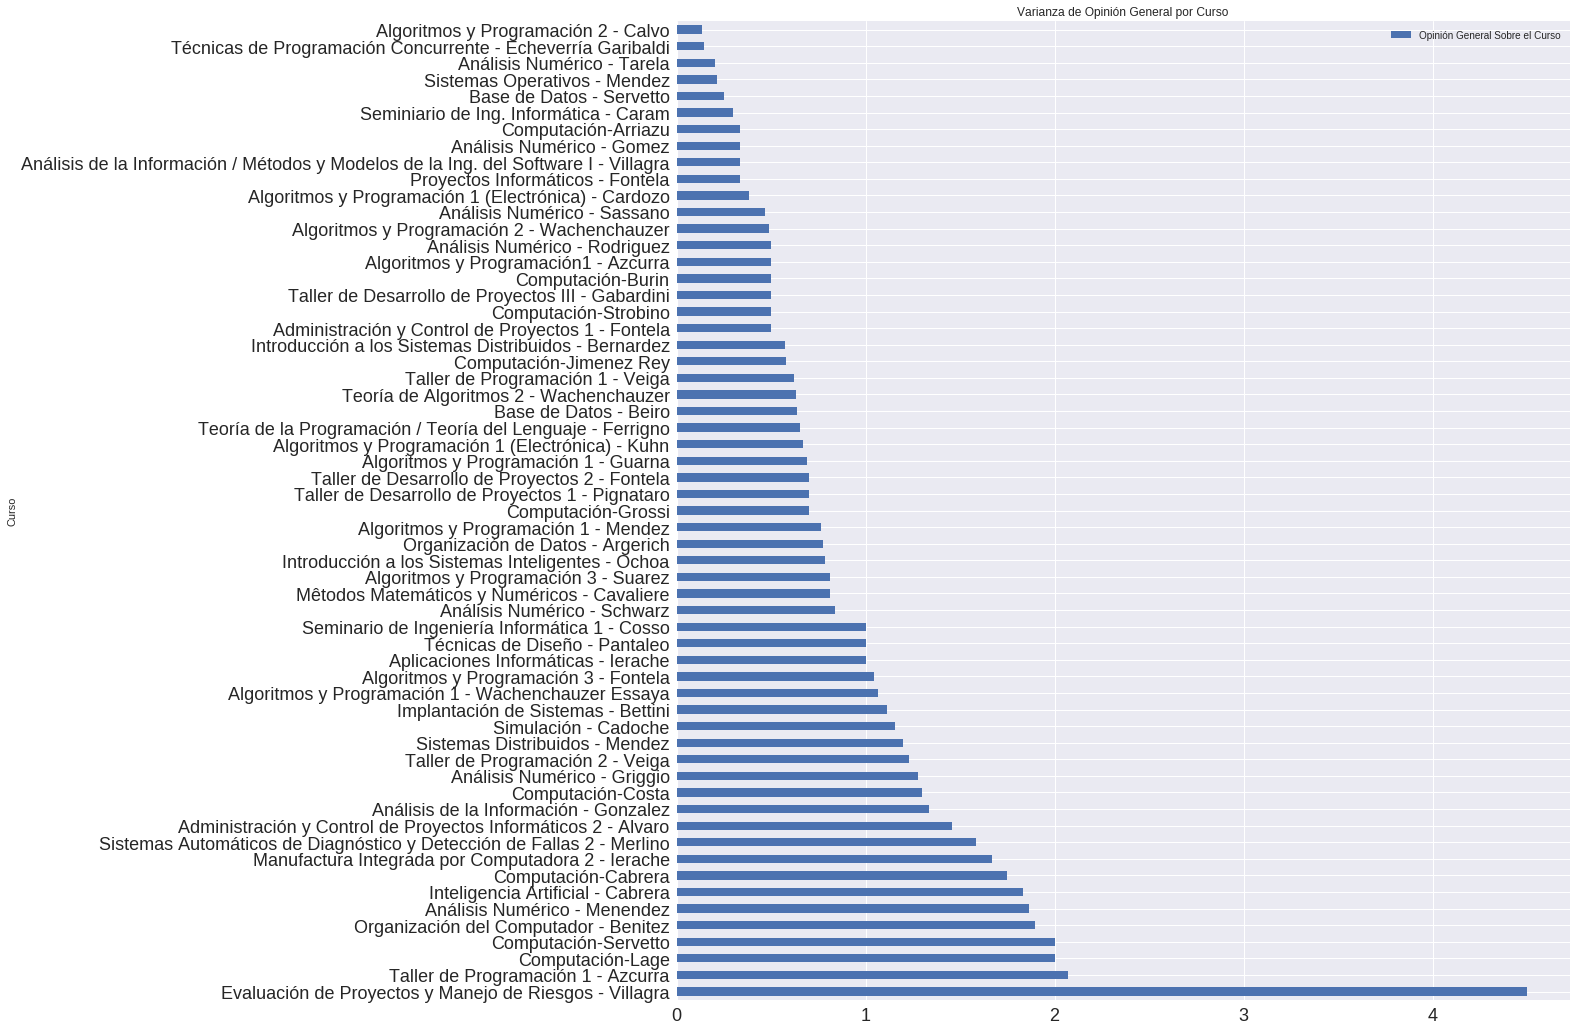

In [23]:
g_var = grouped.var()
gop = g_var.loc[g_var['Opinión General Sobre el Curso']>0,['Opinión General Sobre el Curso']].\
    sort_values(by='Opinión General Sobre el Curso',ascending=False).\
    plot(kind='barh',figsize=(16,18),title='Varianza de Opinión General por Curso',fontsize=18);

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

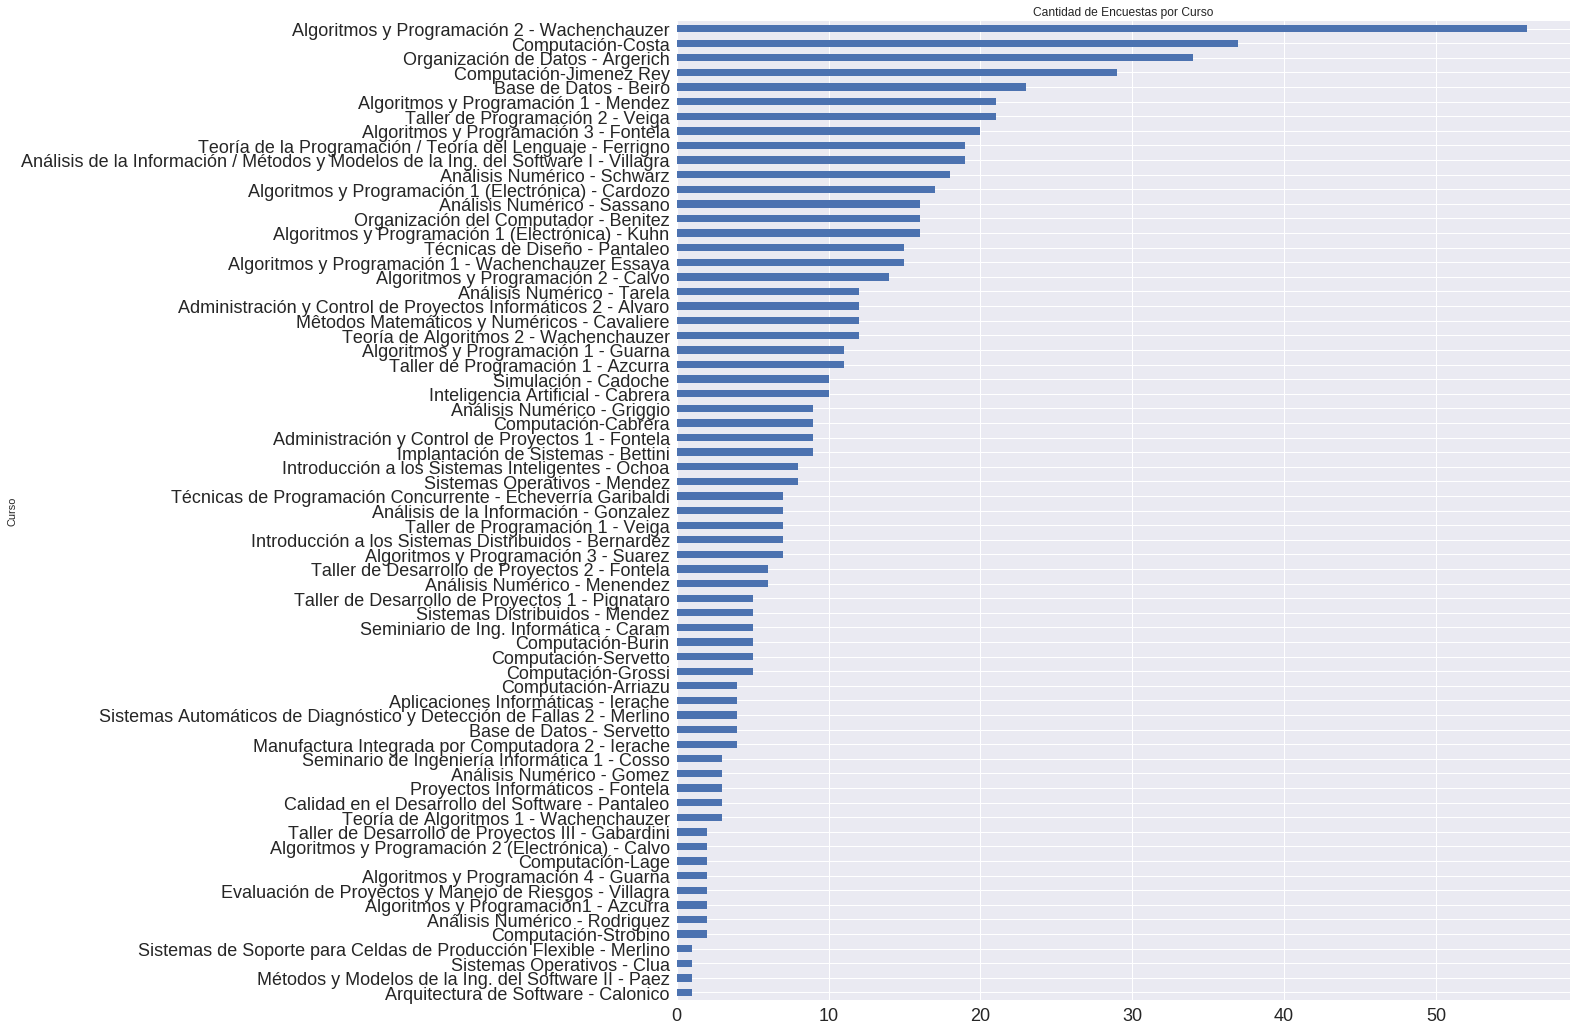

In [22]:
g_mean['votes'].sort_values(ascending=True).plot(kind='barh',figsize=(16,18),title='Cantidad de Encuestas por Curso',fontsize=18);

In [24]:
# Quedarnos unicamente con los cursos que tienen 3 o mas encuestas
g_mean = g_mean.loc[g_mean['votes']>2,:]
lista_cursos = g_mean.index.tolist()

## Heatmap de Evaluación de Cursos (5 o mas respuestas)
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

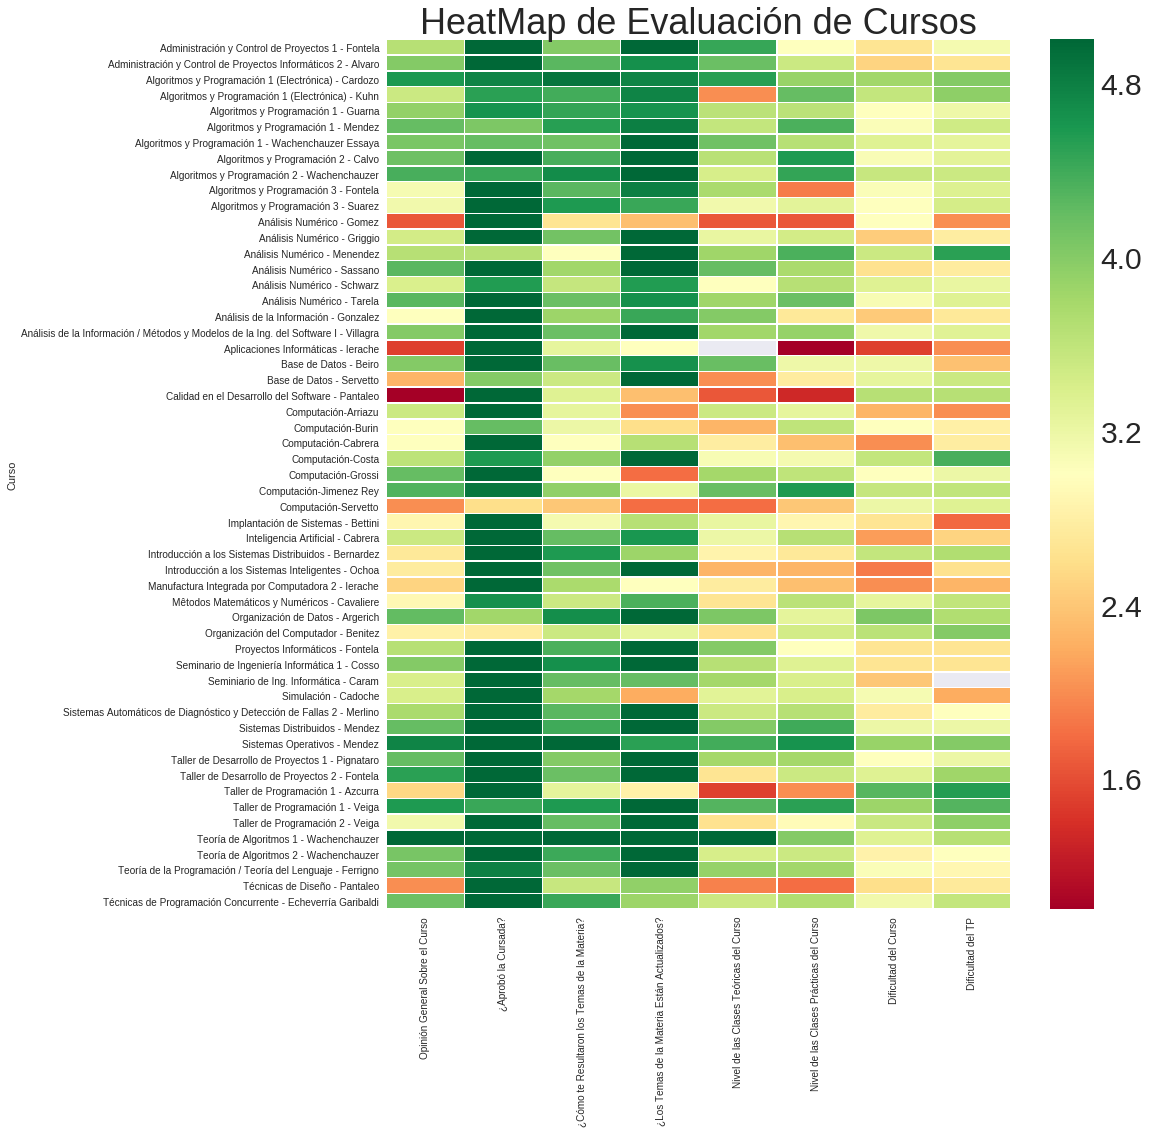

In [25]:
g_mean2 = g_mean.drop('votes',1)
fig, ax = plt.subplots(figsize=(14,16))        
sns.set(font_scale=3.0)
sns.heatmap(g_mean2, annot=False, linewidths=.5,cmap='RdYlGn',  ax=ax);
plt.title('HeatMap de Evaluación de Cursos');

## Histograma del Promedio de Opiniones de los Cursos (un promedio x curso)
Por cada curso se calcula el promedio de la pregunta "Opinión general sobre el curso" y luego se hace un histograma de los resultados. El gráfico solo incluye aquellos cursos con 5 o mas encuestas.

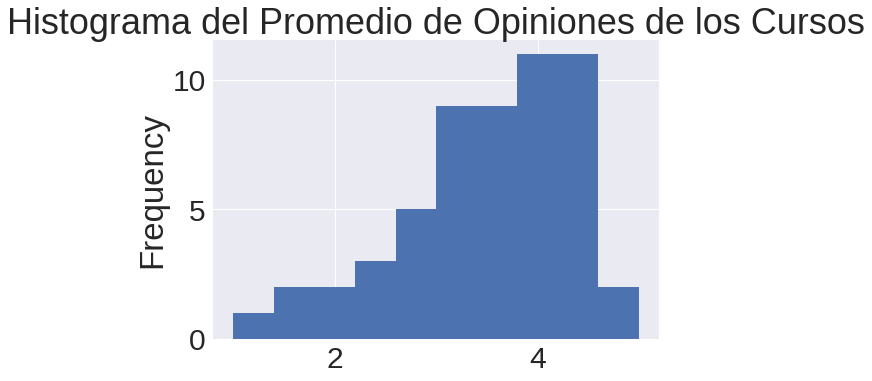

In [26]:
g_mean['Opinión General Sobre el Curso'].plot(kind='hist',bins=10,title='Histograma del Promedio de Opiniones de los Cursos');

## Opinion General Sobre el Curso

In [27]:
CUTLIST = [0,2,3,3.5,4.5,5]
LABELSLIST = ['r','orange','y','g', 'b']

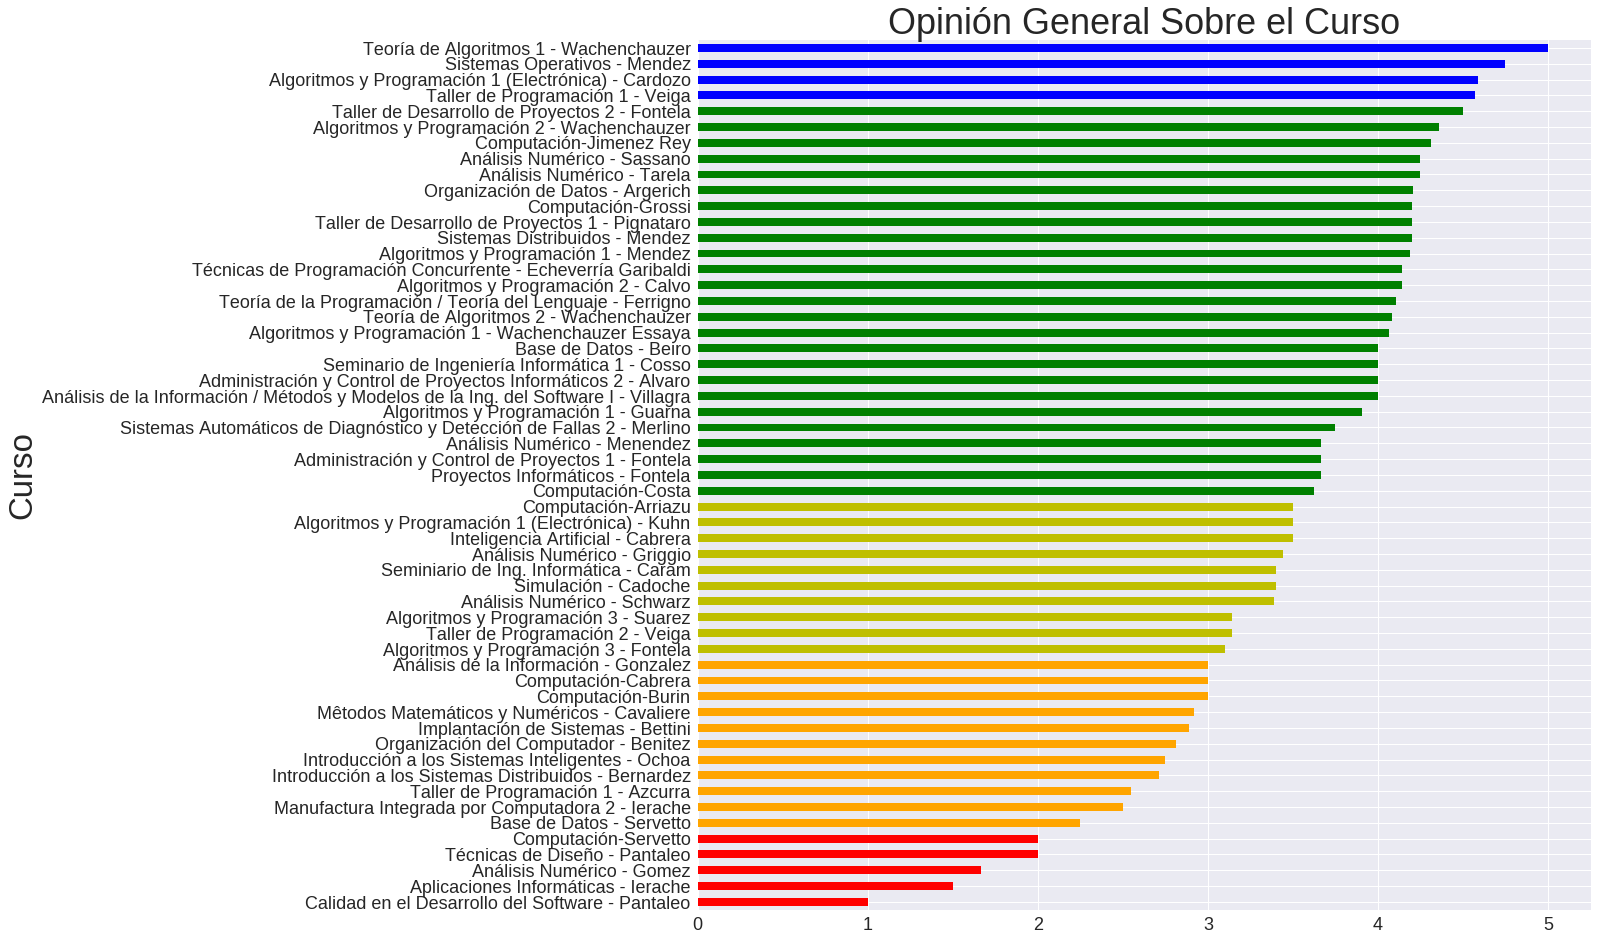

In [29]:
VARIABLE = 'Opinión General Sobre el Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas de la Materia son Interesantes?

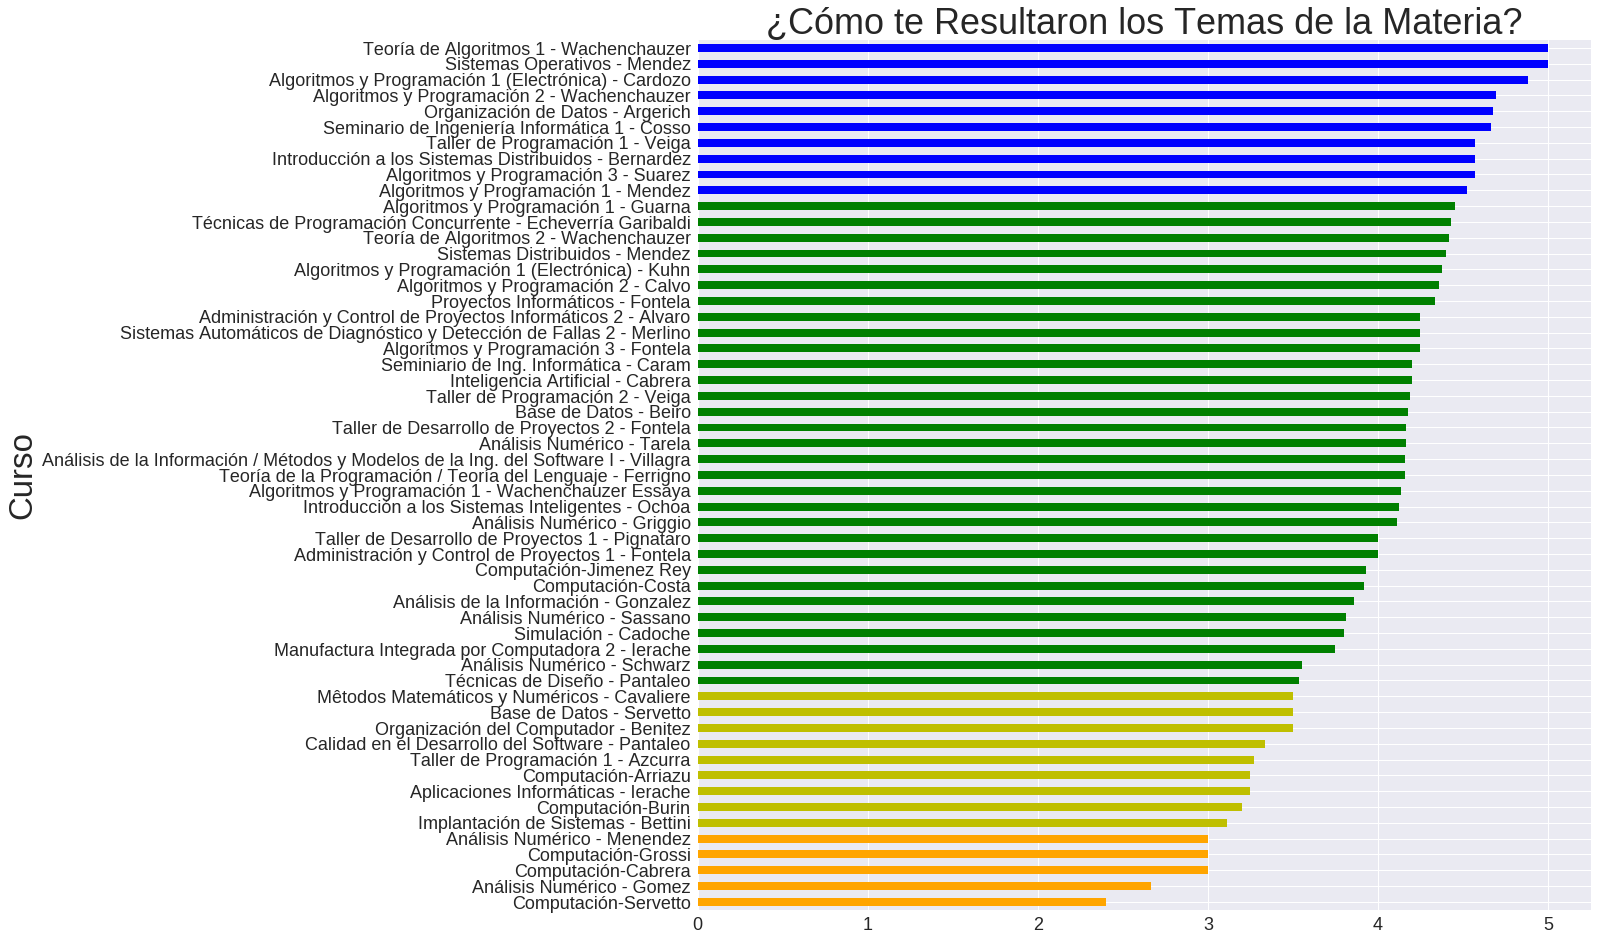

In [31]:
VARIABLE = '¿Cómo te Resultaron los Temas de la Materia?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors= pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas Están Actualizados?

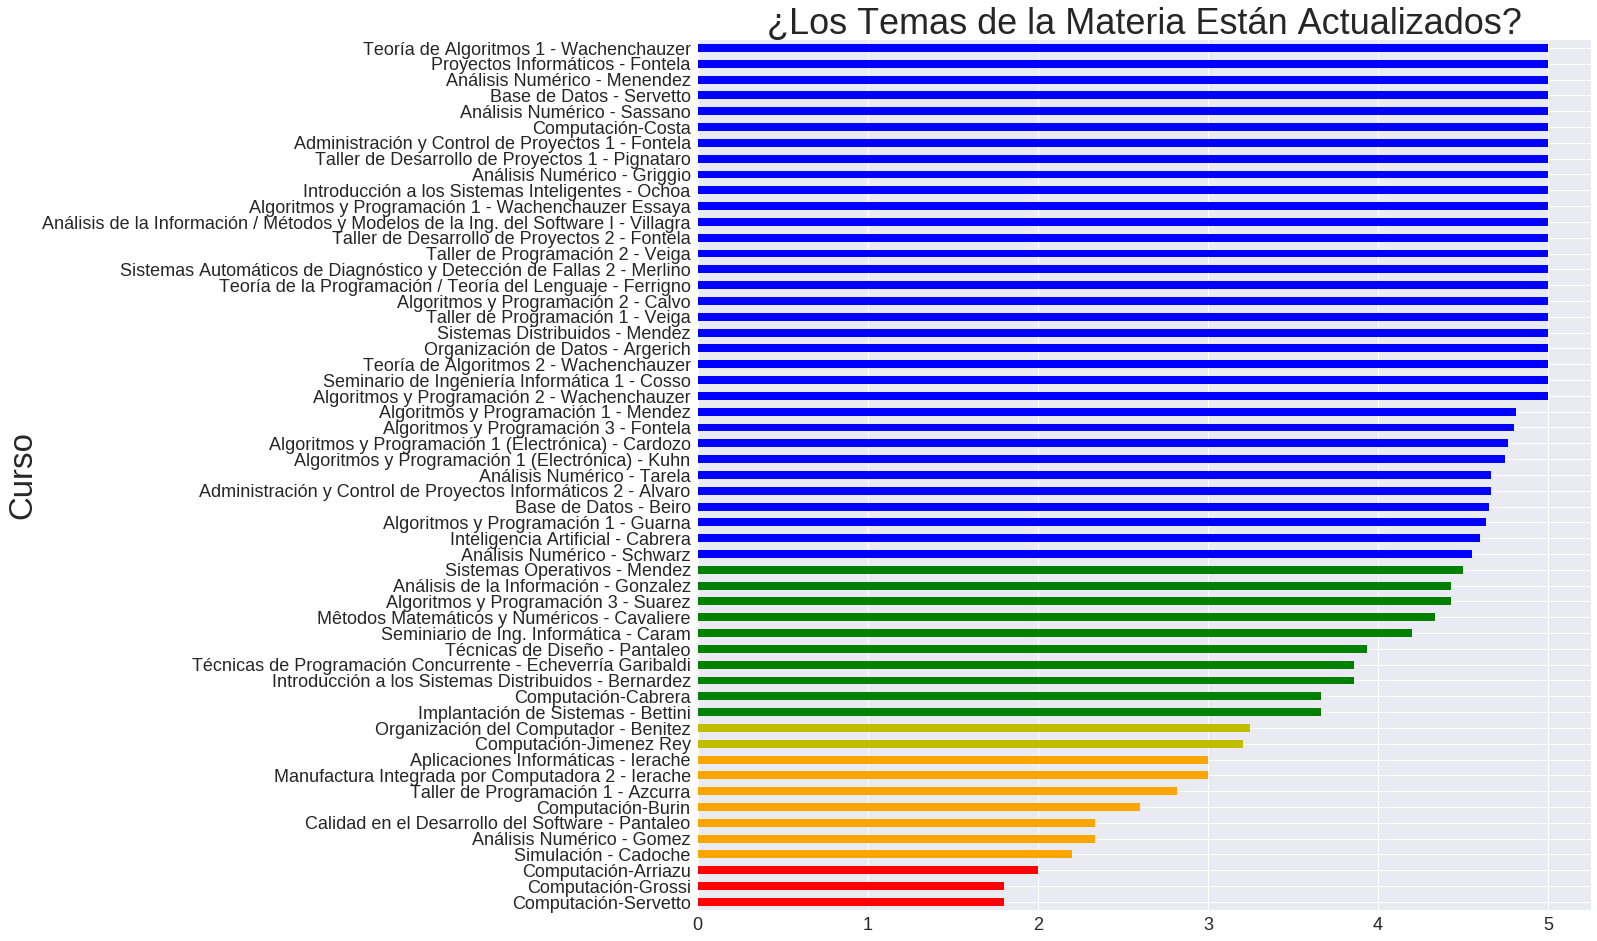

In [32]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Teóricas

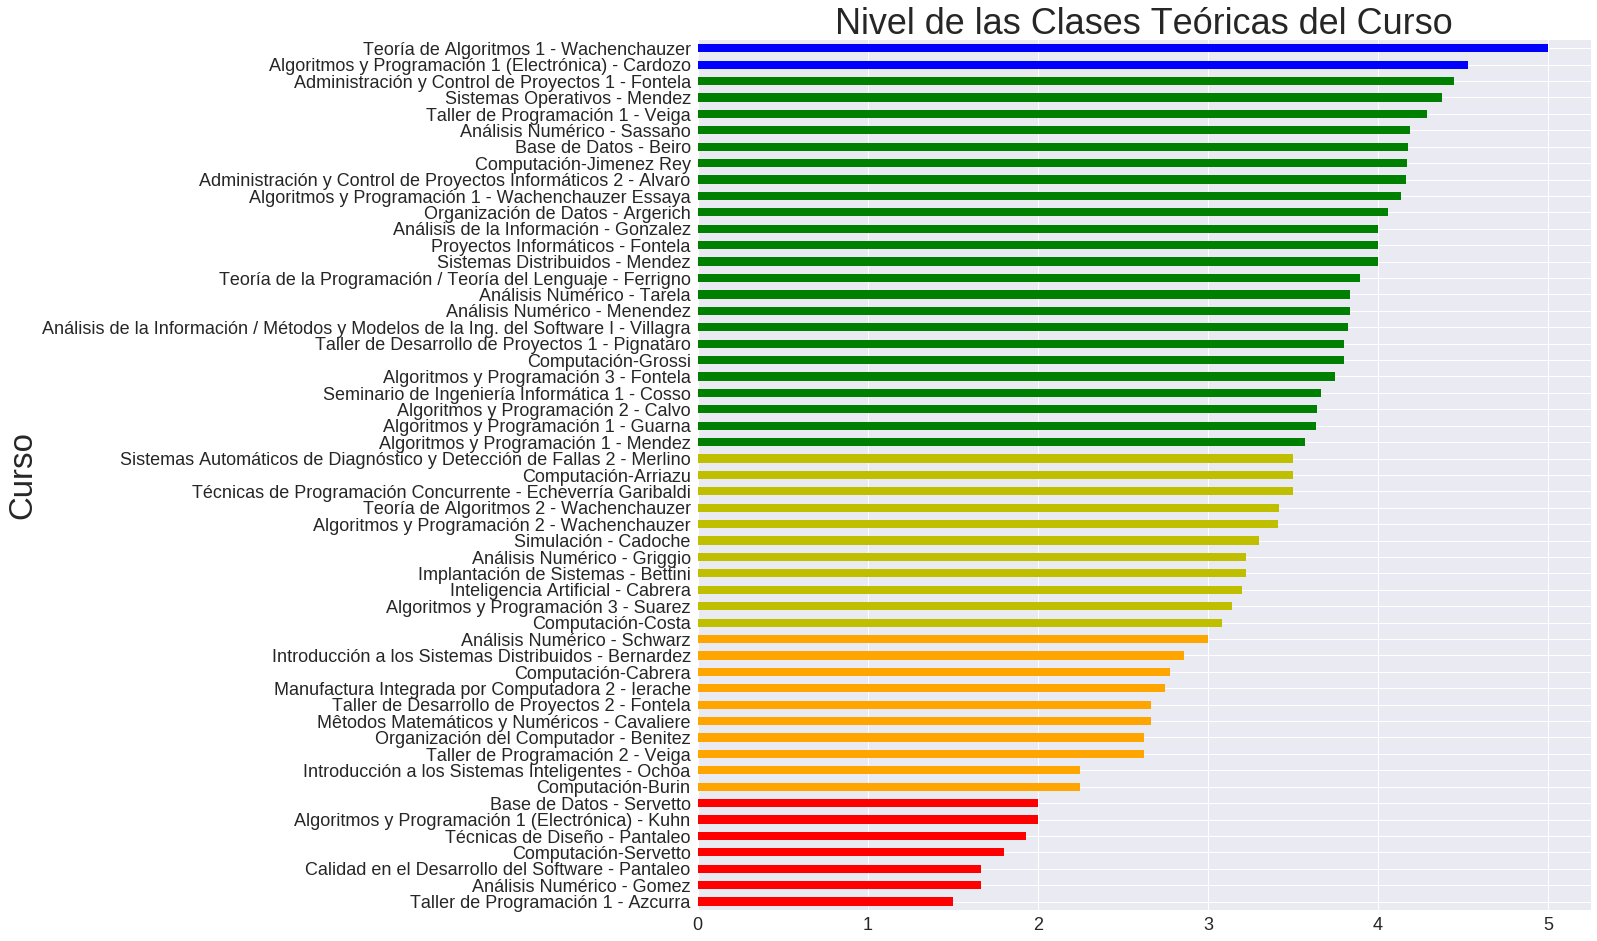

In [33]:
VARIABLE = 'Nivel de las Clases Teóricas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Prácticas del Curso

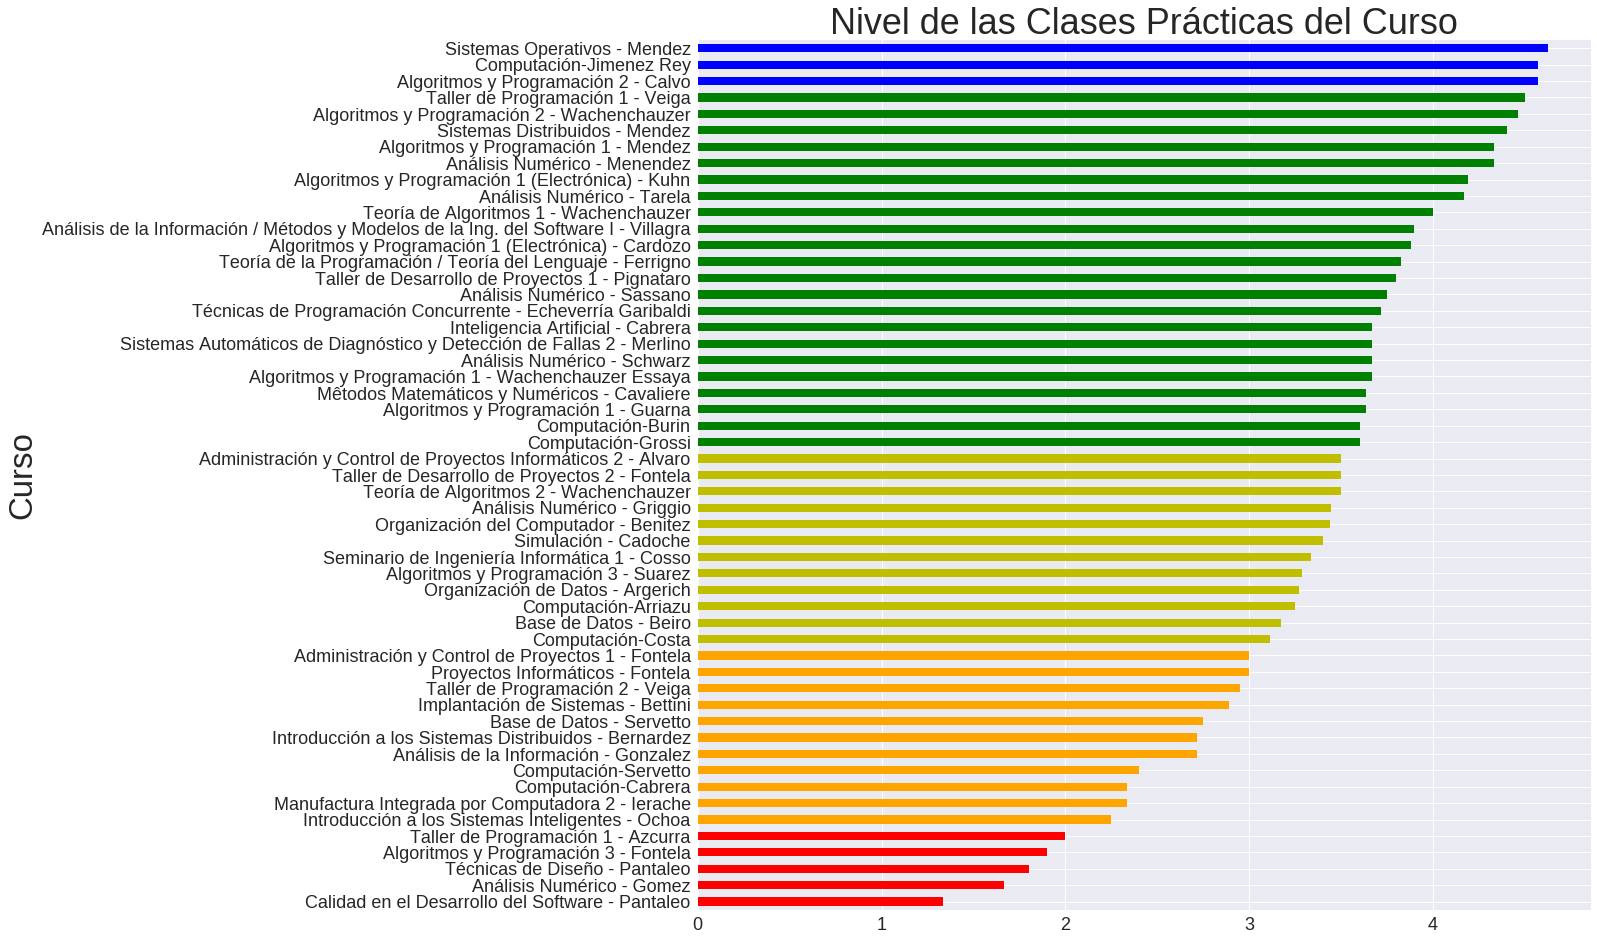

In [34]:
VARIABLE = 'Nivel de las Clases Prácticas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Nivel de las Clases (Promedio de Teóricas y Prácticas)

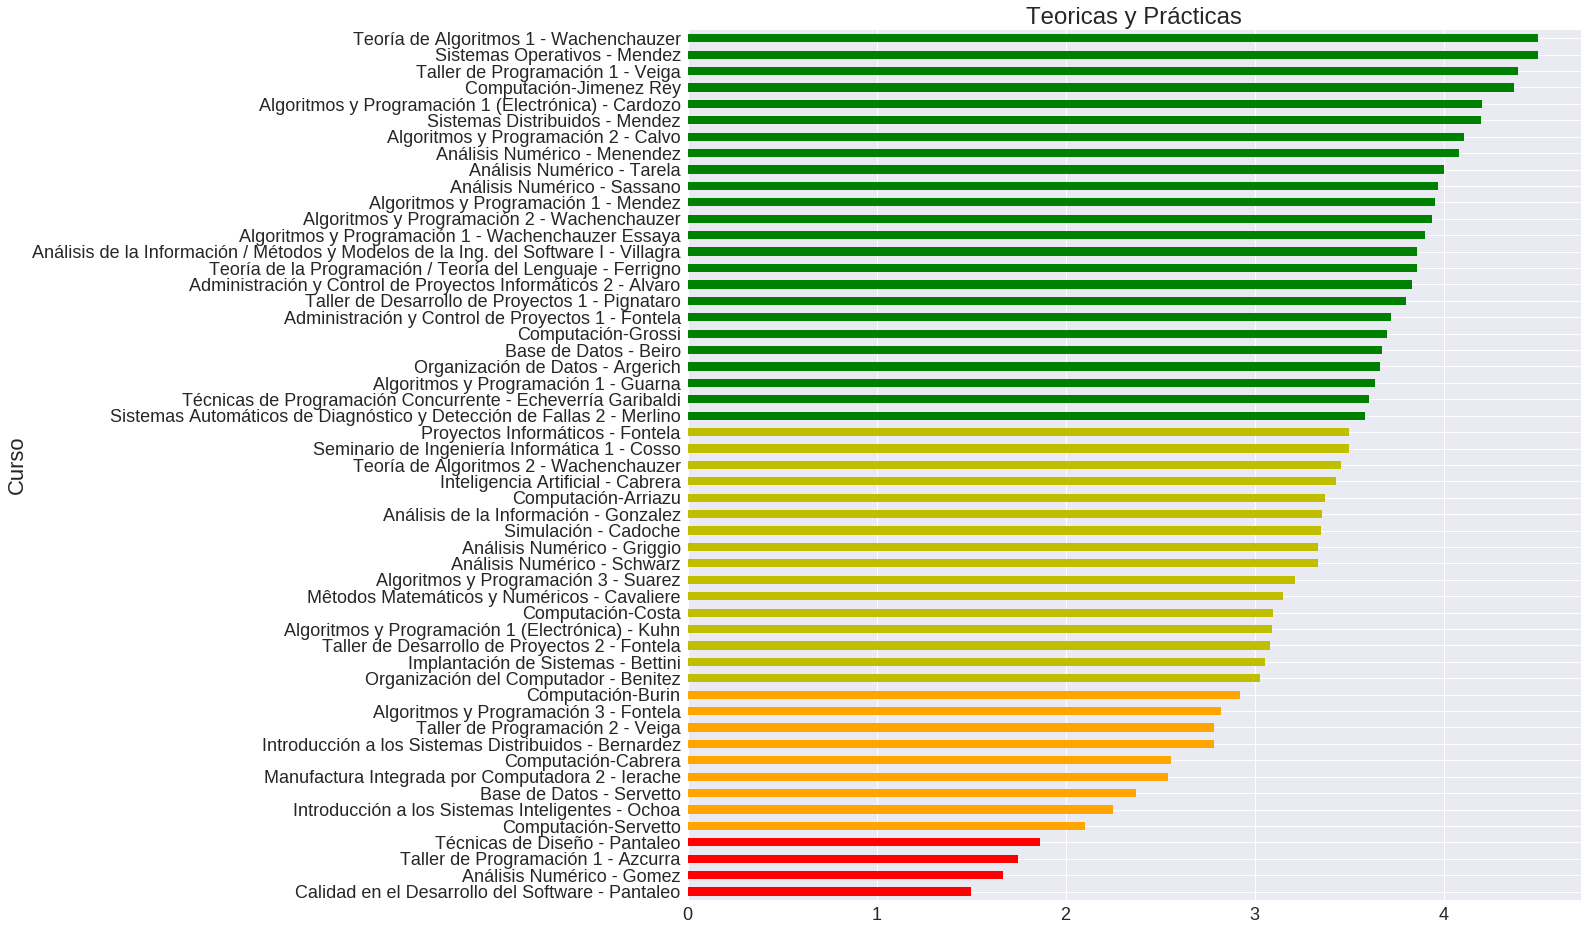

In [51]:
g_mean['Teoricas y Prácticas'] = (g_mean['Nivel de las Clases Prácticas del Curso'] + g_mean['Nivel de las Clases Teóricas del Curso'])/2
VARIABLE = 'Teoricas y Prácticas'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Dificultad del Curso

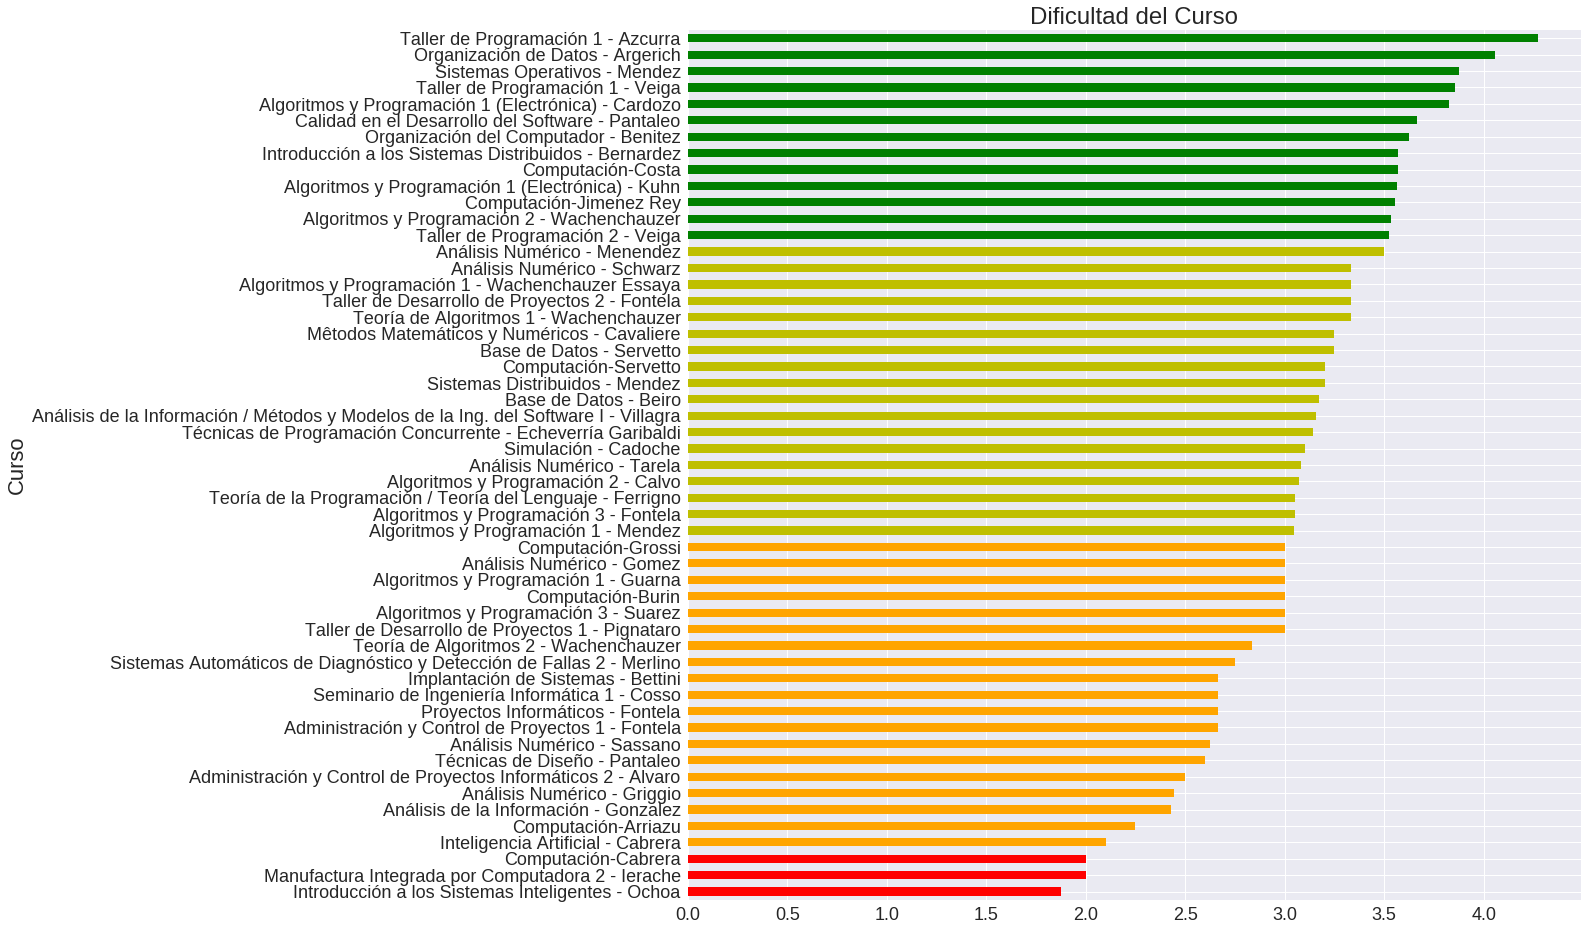

In [36]:
VARIABLE = 'Dificultad del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Relación entre Opinión Sobre el Curso y Dificultad

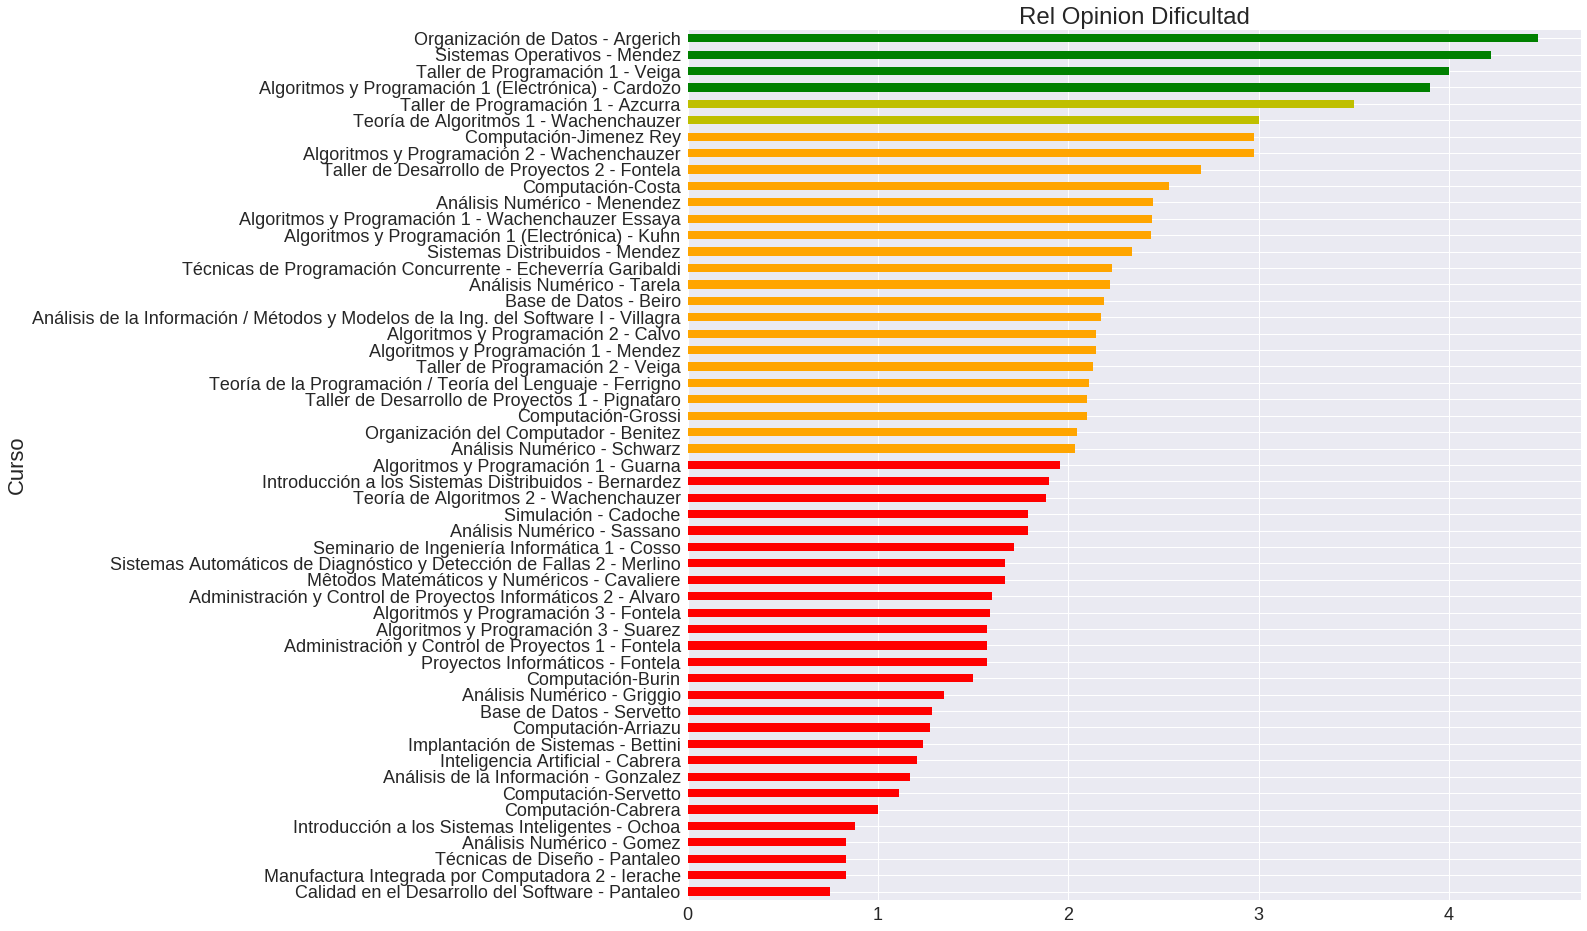

In [50]:
g_mean['Rel Opinion Dificultad'] = (g_mean['Opinión General Sobre el Curso']/(5-g_mean['Dificultad del Curso'])).sort_values()
VARIABLE = 'Rel Opinion Dificultad'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Correlacion Entre Variables

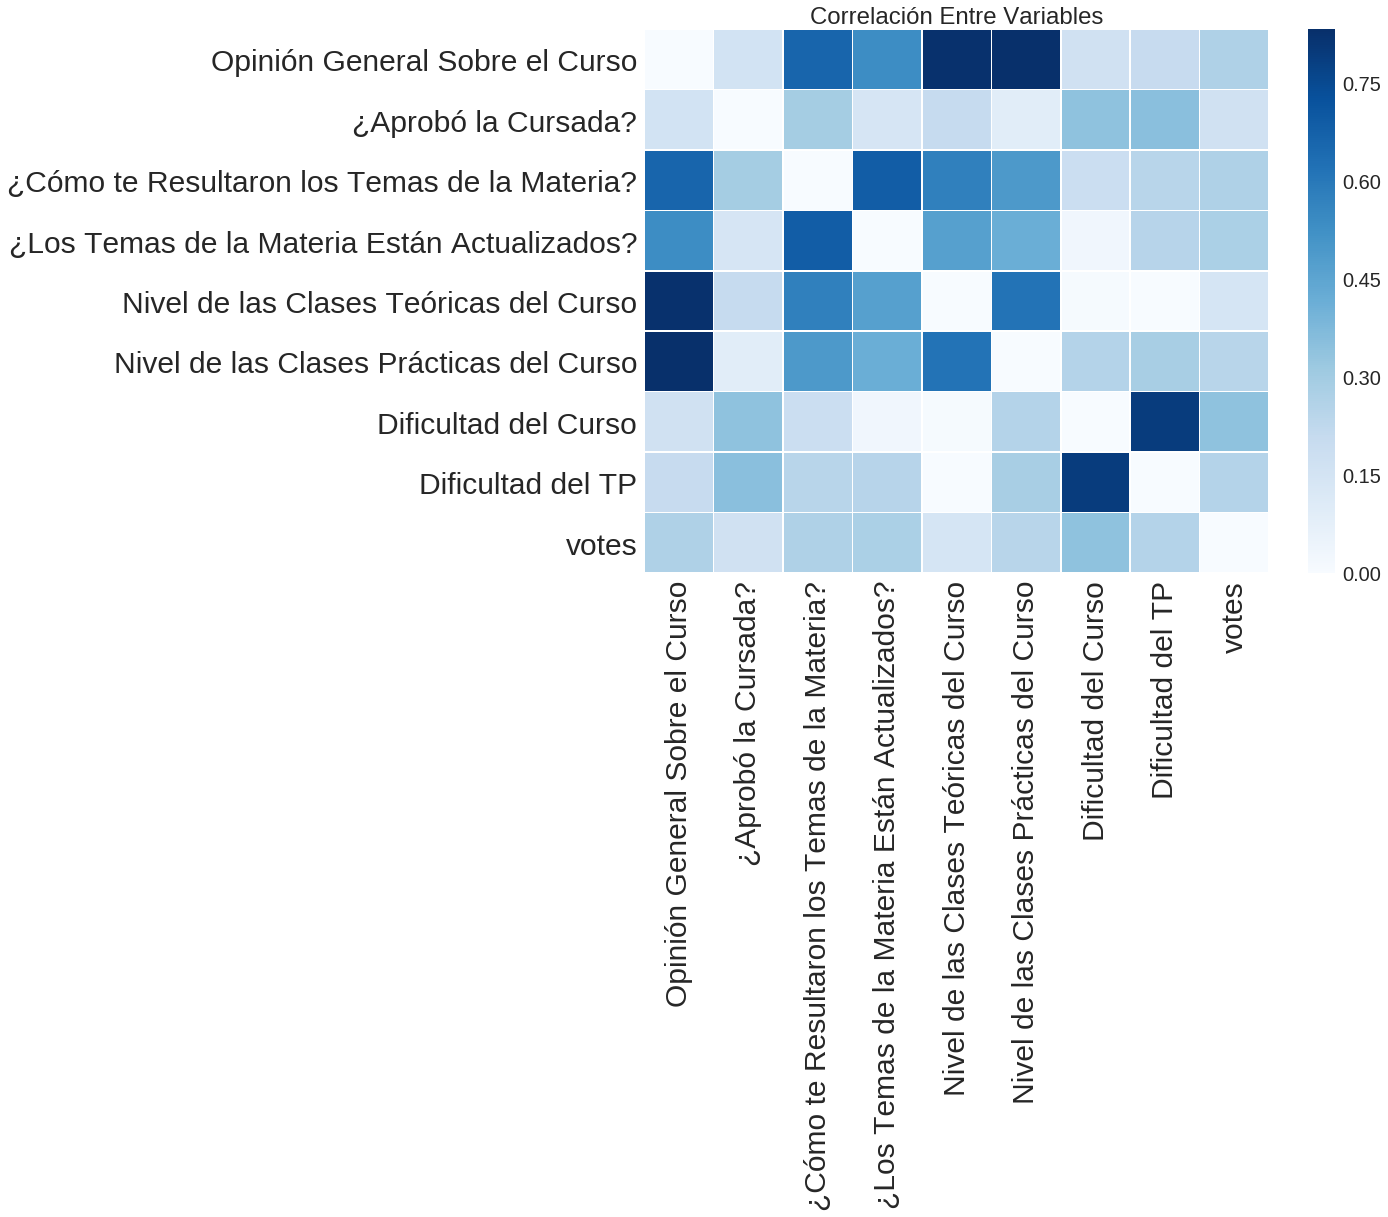

In [35]:
cor = g_mean.corr()
cor.values[[np.arange(9)]*2] = 0
cor.drop('votes',axis=1)
fig, ax = plt.subplots(figsize=(14,10))         # Sample f"igsize in inches
sns.set(font_scale=2)
sns.heatmap(cor.applymap(abs),annot=False, linewidths=.5,cmap='Blues',  ax=ax);
plt.title('Correlación Entre Variables');

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
Hacia la derecha: Las clases teóricas son mejores que las prácticas.
Hacia la izquierda: Las clases prácticas son mejores que las teóricas.
En el centro: Poca o Ninguna diferencia.

In [54]:
g_mean['dif_teo_prac'] = ((g_mean['Nivel de las Clases Teóricas del Curso']-(g_mean['Nivel de las Clases Prácticas del Curso'])))

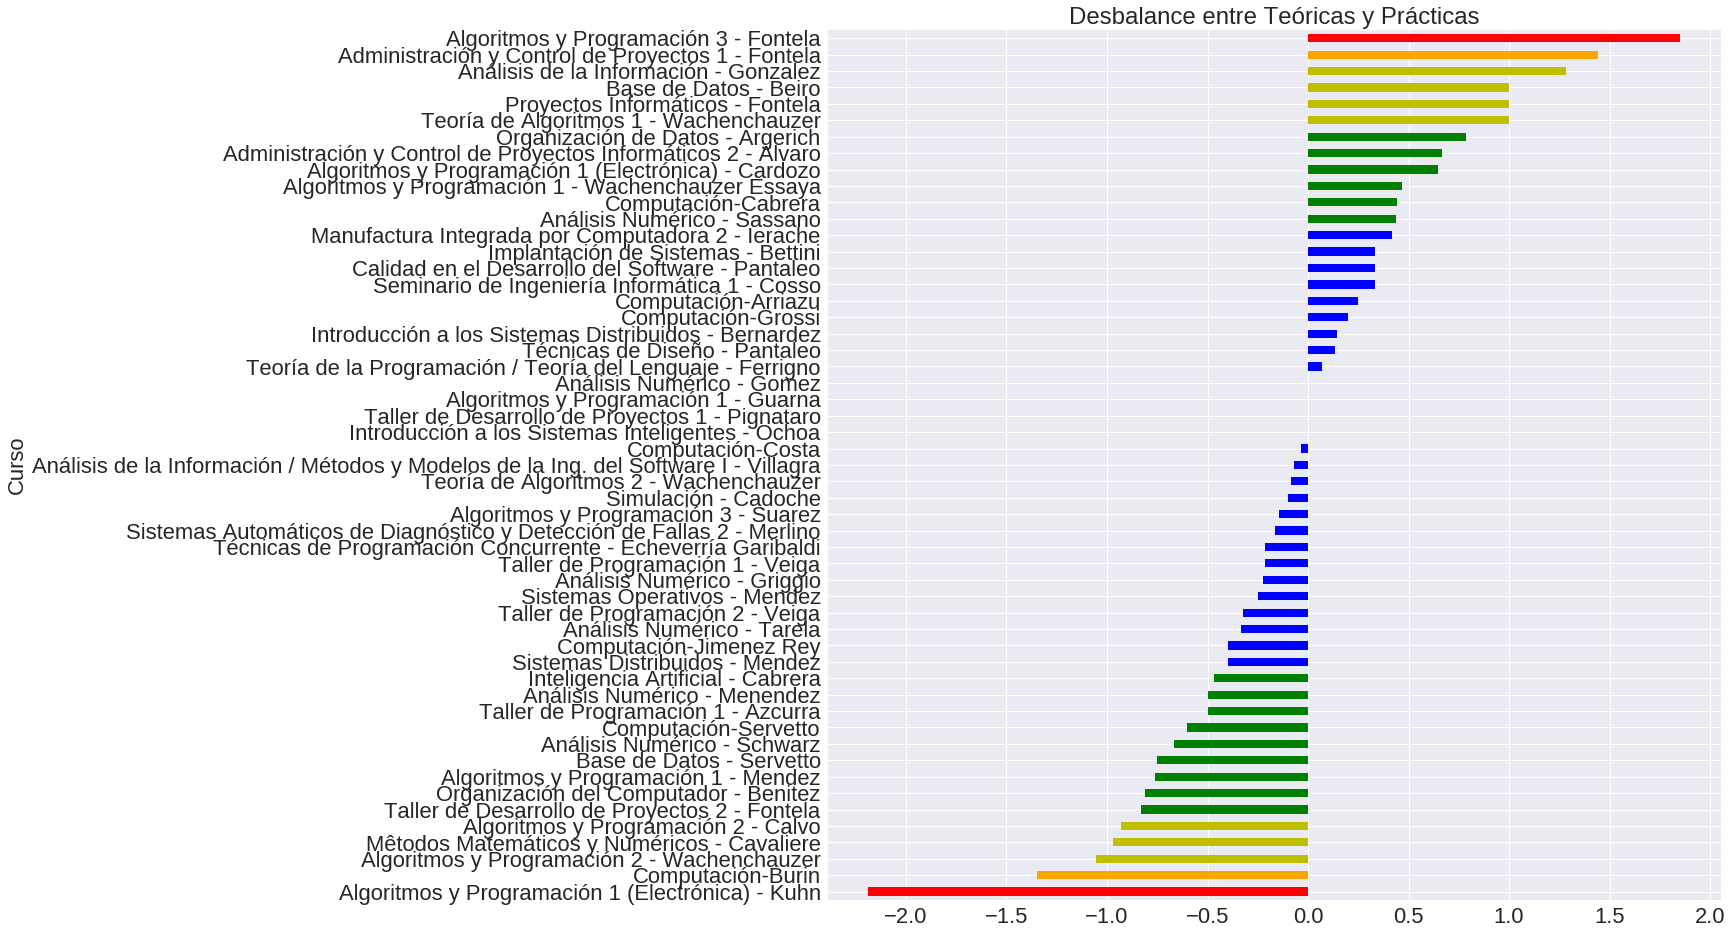

In [55]:
VARIABLE = 'dif_teo_prac'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(-abs(g_mean[VARIABLE]),5,labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title='Desbalance entre Teóricas y Prácticas');

## Promedio General por Curso

In [60]:
g_mean['general_ave'] = (g_mean['Opinión General Sobre el Curso']+g_mean['¿Cómo te Resultaron los Temas de la Materia?']+g_mean['¿Los Temas de la Materia Están Actualizados?']+g_mean['Nivel de las Clases Teóricas del Curso']+g_mean['Nivel de las Clases Prácticas del Curso']+g_mean['Dificultad del Curso'])/6

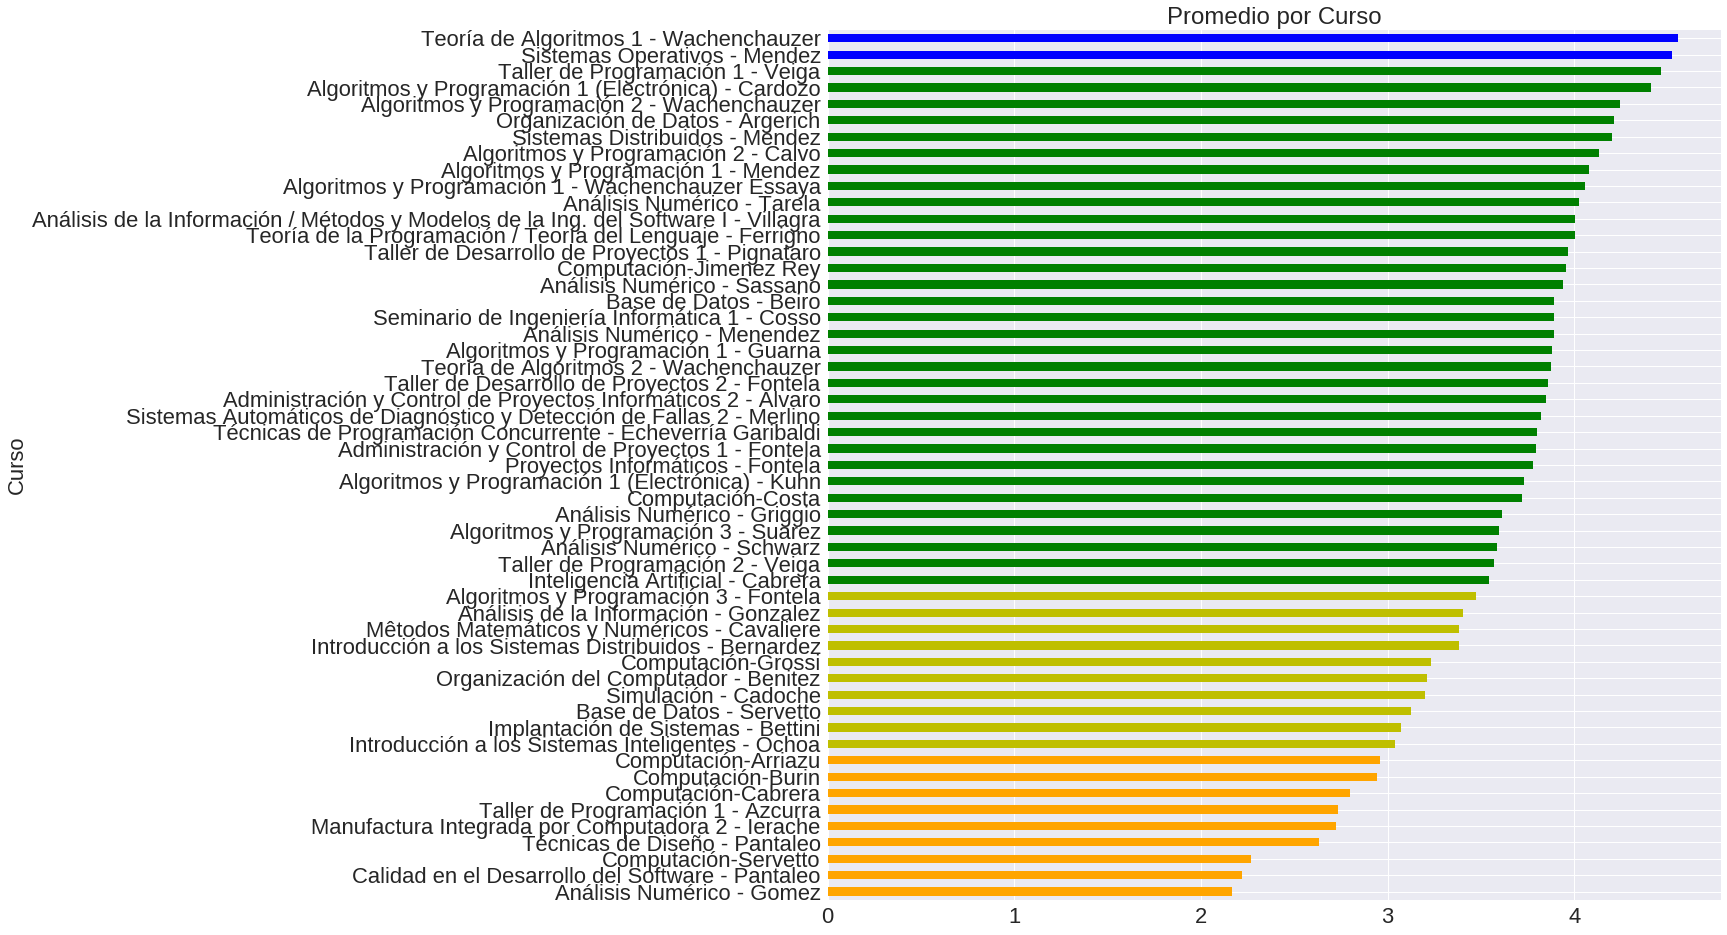

In [61]:
VARIABLE = 'general_ave'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title="Promedio por Curso");

# Comentarios por Curso

In [63]:
pd.set_option('max_colwidth',-1)
pd.set_option('max_r',999)
comp[['Curso','Comentarios Sobre el Curso']].sort_values(by = 'Curso').dropna()

Curso  \
393  Administración y Control de Proyectos 1 - Fontela                                     
61   Administración y Control de Proyectos 1 - Fontela                                     
425  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
454  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
387  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
423  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
360  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
344  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
363  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
161  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
4    Administración y Control de Proyectos Informáticos 2 - Alvaro                         
543  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
420  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
437  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
391  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
381  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
339  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
583  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
375  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
371  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
364  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
394  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
358  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
348  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
347  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
352  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
628  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
612  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
595  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
305  Algoritmos y Programación 1 - Guarna                                                  
58   Algoritmos y Programación 1 - Guarna                                                  
134  Algoritmos y Programación 1 - Mendez                                                  
235  Algoritmos y Programación 1 - Mendez                                                  
167  Algoritmos y Programación 1 - Mendez                                                  
333  Algoritmos y Programación 1 - Mendez                                                  
328  Algoritmos y Programación 1 - Mendez                                                  
310  Algoritmos y Programación 1 - Mendez                                                  
19   Algoritmos y Programación 1 - Mendez                                                  
302  Algoritmos y Programación 1 - Mendez                                                  
189  Algoritmos y Programación 1 - Mendez                                                  
502  Algoritmos y Programación 1 - Mendez                                                  
127  Algoritmos y Programación 1 - Mendez                                                  
106  Algoritmos y Programación 1 - Wachenchauzer Essaya                                    
156  Algoritmos y Programación 1 - 

In [64]:
comp.columns

Index(['Timestamp', 'Curso', 'Opinión General Sobre el Curso',
       '¿Aprobó la Cursada?', '¿Cómo te Resultaron los Temas de la Materia?',
       '¿Los Temas de la Materia Están Actualizados?',
       'Nivel de las Clases Teóricas del Curso',
       'Nivel de las Clases Prácticas del Curso', 'Dificultad del Curso',
       'Dificultad del TP', 'Comentarios Sobre el Curso'],
      dtype='object')

In [65]:
comp['¿Aprobó la Cursada?'] = (comp['¿Aprobó la Cursada?'] == 5)

In [66]:
comp['¿Los Temas de la Materia Están Actualizados?'] = (comp['¿Los Temas de la Materia Están Actualizados?'] == 5)

In [67]:
lista_cursos = list(comp.groupby('Curso').size().sort_values(ascending=False).keys())

# Resultados curso por curso

In [68]:
# Por curso

for curso in lista_cursos:
    chunk = comp[comp['Curso'] == curso]
    print(curso)
    print("Num votes:",len(chunk))
    print("Opinion General:",round(chunk['Opinión General Sobre el Curso'].mean(),2))
    print("Nivel de las Clases Teóricas del Curso:",round(chunk['Nivel de las Clases Teóricas del Curso'].mean(),2))
    print("Nivel de las Clases Prácticas del Curso:",round(chunk['Nivel de las Clases Prácticas del Curso'].mean(),2))
    print("Dificultad del Curso:",round(chunk['Dificultad del Curso'].mean(),2))
    print("Dificultad del TP:",round(chunk['Dificultad del TP'].mean(),2))
    print("¿Cómo te Resultaron los Temas de la Materia?:",round(chunk['¿Cómo te Resultaron los Temas de la Materia?'].mean(),2))
    print("¿Los Temas de la Materia Están Actualizados?:",round(chunk['¿Los Temas de la Materia Están Actualizados?'].mean(),2))    
    print("Aprobo la cursada:",round(chunk['¿Aprobó la Cursada?'].mean(),2))
    print("----------------------")

Algoritmos y Programación 2 - Wachenchauzer
Num votes: 56
Opinion General: 4.36
Nivel de las Clases Teóricas del Curso: 3.41
Nivel de las Clases Prácticas del Curso: 4.46
Dificultad del Curso: 3.54
Dificultad del TP: 3.5
¿Cómo te Resultaron los Temas de la Materia?: 4.7
¿Los Temas de la Materia Están Actualizados?: 1.0
Aprobo la cursada: 0.86
----------------------
Computación-Costa
Num votes: 37
Opinion General: 3.62
Nivel de las Clases Teóricas del Curso: 3.08
Nivel de las Clases Prácticas del Curso: 3.11
Dificultad del Curso: 3.57
Dificultad del TP: 4.35
¿Cómo te Resultaron los Temas de la Materia?: 3.92
¿Los Temas de la Materia Están Actualizados?: 1.0
Aprobo la cursada: 0.89
----------------------
Organización de Datos - Argerich
Num votes: 34
Opinion General: 4.21
Nivel de las Clases Teóricas del Curso: 4.06
Nivel de las Clases Prácticas del Curso: 3.27
Dificultad del Curso: 4.06
Dificultad del TP: 3.71
¿Cómo te Resultaron los Temas de la Materia?: 4.68
¿Los Temas de la Materia E

# Analisis Historico

In [69]:
comp_1 = pd.read_csv('encuesta.csv')
comp_2 = pd.read_csv('encuesta2.csv')
comp['cuatrimestre'] = 3
comp_1['cuatrimestre'] = 1
comp_2['cuatrimestre'] = 2

In [70]:
comp_1 = map_answers(comp_1)
comp_2 = map_answers(comp_2)

In [71]:
grouped_1 = comp_1.groupby('Curso').mean()
grouped_2 = comp_2.groupby('Curso').mean()
grouped_3 = comp.groupby('Curso').mean()

In [72]:
all_data = pd.concat([grouped_1,grouped_2,grouped_3],axis=0)
grouped = all_data.sort_values('cuatrimestre').groupby('Curso')

In [73]:
for name,group in grouped:
    print(name)
    print("Opinión General Sobre el Curso",group['Opinión General Sobre el Curso'].values)
    print("Nivel de las Clases Teóricas del Curso",group['Nivel de las Clases Teóricas del Curso'].values)
    print("Nivel de las Clases Prácticas del Curso",group['Nivel de las Clases Prácticas del Curso'].values)
    print("--------------")

Administración y Control de Proyectos 1 - Fontela
Opinión General Sobre el Curso [ 3.4         3.91666667  3.66666667]
Nivel de las Clases Teóricas del Curso [ 4.          4.25        4.44444444]
Nivel de las Clases Prácticas del Curso [ 2.6  2.5  3. ]
--------------
Administración y Control de Proyectos Informáticos 2 - Alvaro
Opinión General Sobre el Curso [ 4.]
Nivel de las Clases Teóricas del Curso [ 4.16666667]
Nivel de las Clases Prácticas del Curso [ 3.5]
--------------
Administración y Control de Proyectos Informáticos 2 - Gabardini
Opinión General Sobre el Curso [ 3.2  4. ]
Nivel de las Clases Teóricas del Curso [ 4.   3.5]
Nivel de las Clases Prácticas del Curso [ 4.   3.5]
--------------
Algoritmos y Programación 1 (Electrónica) - Cardozo
Opinión General Sobre el Curso [ 4.23529412  4.7         4.58823529]
Nivel de las Clases Teóricas del Curso [ 4.35294118  4.7         4.52941176]
Nivel de las Clases Prácticas del Curso [ 3.82352941  4.13333333  3.88235294]
--------------
A